In [1]:
import pandas as pd

# Load the test data for making predictions
train_data = pd.read_csv('train.csv')


In [2]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
missing_values = train_data.isnull()

In [4]:
print(missing_values)

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

In [5]:
missing_count = missing_values.sum()


In [6]:
# as we are not able to see all values we use display.max_column/rows to see all 81 values 
print(missing_count)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
import pandas as pd

# Set Pandas display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Now, when you print the DataFrame, it will display all columns and rows
print(missing_count)


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
""" 
We will drop these features as they have large missing values and our dataset is large
LotFrontage       259
Alley            1369
MasVnrType        872
FireplaceQu       690
PoolQC           1453
Fence            1179
MiscFeature      1406
"""

' \nWe will drop these features as they have large missing values and our dataset is large\nLotFrontage       259\nAlley            1369\nMasVnrType        872\nFireplaceQu       690\nPoolQC           1453\nFence            1179\nMiscFeature      1406\n'

In [9]:
# Specify columns to drop
columns_to_drop = ['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

# Filter the columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in train_data.columns]

# Drop the specified columns
train_data = train_data.drop(columns=columns_to_drop)

# Recalculate missing counts
missing_count = train_data.isnull().sum()

# Set Pandas display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Now, when you print the DataFrame, it will display all columns and rows
print(missing_count)


Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0


In [10]:
 # List of categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns
print(categorical_features)

# List of numerical features
numerical_features = train_data.select_dtypes(exclude=['object']).columns
print(numerical_features)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea'

In [11]:
""" Numerical Features (e.g., columns with data types 'int' or 'float):
You can use the .describe() method to get summary statistics for numerical features. This
method provides statistics such as count, mean, standard deviation, minimum, and maximum 
values for each numerical feature. Here's how to use it:"""

" Numerical Features (e.g., columns with data types 'int' or 'float):\nYou can use the .describe() method to get summary statistics for numerical features. This\nmethod provides statistics such as count, mean, standard deviation, minimum, and maximum \nvalues for each numerical feature. Here's how to use it:"

In [12]:
# Describe numerical features
numerical_description = train_data.describe()
print(numerical_description)


                Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000

In [13]:
"""
MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,
GarageYrBlt,GarageFinish,GarageQual,GarageCond (12 in total missing values)
# total 1460 values are there
"""

'\nMasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,\nGarageYrBlt,GarageFinish,GarageQual,GarageCond (12 in total missing values)\n# total 1460 values are there\n'

In [14]:
""" Categorical Features (e.g., columns with data type 'object'):
For categorical features, you can use techniques like the .value_counts() method to see the 
distribution of unique values in each categorical feature. This will give you a sense of the 
different categories within each column. Here's an example:"""

" Categorical Features (e.g., columns with data type 'object'):\nFor categorical features, you can use techniques like the .value_counts() method to see the \ndistribution of unique values in each categorical feature. This will give you a sense of the \ndifferent categories within each column. Here's an example:"

In [15]:
for feature in categorical_features:
    print(f"Feature: {feature}")
    print(train_data[feature].value_counts())
    print("\n")


Feature: MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


Feature: Street
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


Feature: LotShape
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


Feature: LandContour
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


Feature: Utilities
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


Feature: LotConfig
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


Feature: LandSlope
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


Feature: Neighborhood
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDO

In [16]:
"""
MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,
GarageYrBlt,GarageFinish,GarageQual,GarageCond (12 in total missing values)
# total 1460 values are there
"""


'\nMasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,\nGarageYrBlt,GarageFinish,GarageQual,GarageCond (12 in total missing values)\n# total 1460 values are there\n'

In [17]:
# fixing final missing values 

In [18]:
# 1.) MasVnrArea:
# Strategy: Replace missing values with the mean value since it's a continuous numeric variable.

train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean(), inplace=True)


In [19]:
# 2.) BsmtQual:
# Strategy: Replace missing values with the mode (most frequent category) since it's a 
# categorical variable.

In [20]:
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0], inplace=True)


In [21]:
# 3.) BsmtCond:
# Strategy: Replace missing values with the mode (most frequent category) since it's 
# a categorical variable.

In [22]:
train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0], inplace=True)


In [23]:
# 4.) BsmtExposure:
# Strategy: Replace missing values with the mode (most frequent category) since it's 
# a categorical variable.

In [24]:
train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0], inplace=True)


In [25]:
# 5.) BsmtFinType1:
# Strategy: Replace missing values with the mode (most frequent category) since it's
# a categorical variable.

In [26]:
train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0], inplace=True)


In [27]:
# 6.) BsmtFinType2:
# Strategy: Replace missing values with the mode (most frequent category) since it's
# a categorical variable.

In [28]:
train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0], inplace=True)


In [29]:
# 7.) Electrical:
# Strategy: Replace the single missing value with the mode (most frequent category) since it's 
# a categorical variable.

In [30]:
train_data['Electrical'].fillna(train_data['Electrical'].mode()[0], inplace=True)


In [31]:
# 8.) GarageType:
# Strategy: Replace missing values with the mode (most frequent category) since it's a 
# categorical variable.

In [32]:
train_data['GarageType'].fillna(train_data['GarageType'].mode()[0], inplace=True)


In [33]:
# 9.) GarageYrBlt:
# Strategy: Check the distribution of GarageYrBlt using EDA. Depending on the distribution,
# we can choose to replace missing values with the mean, median, or mode.

In [34]:
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean(), inplace=True)


In [35]:
# 10.) GarageFinish:
# Strategy: Replace missing values with the mode (most frequent category) since it's a 
# categorical variable.


In [36]:
train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0], inplace=True)


In [37]:
# 11.) GarageQual:
# Strategy: Replace missing values with the mode (most frequent category) since it's a 
# categorical variable.


In [38]:
train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0], inplace=True)


In [39]:
# 12.) GarageCond:
# Strategy: Replace missing values with the mode (most frequent category) since it's a 
# categorical variable.

In [40]:
train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0], inplace=True)


In [41]:
# Recalculate missing counts second time 
missing_count = train_data.isnull().sum()

# Set Pandas display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Now, when you print the DataFrame, it will display all columns and rows
print(missing_count)

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [42]:
# now we have no missing values so our dataset is complete for next step

In [43]:
# just for conformation we see its heat map for missing values 

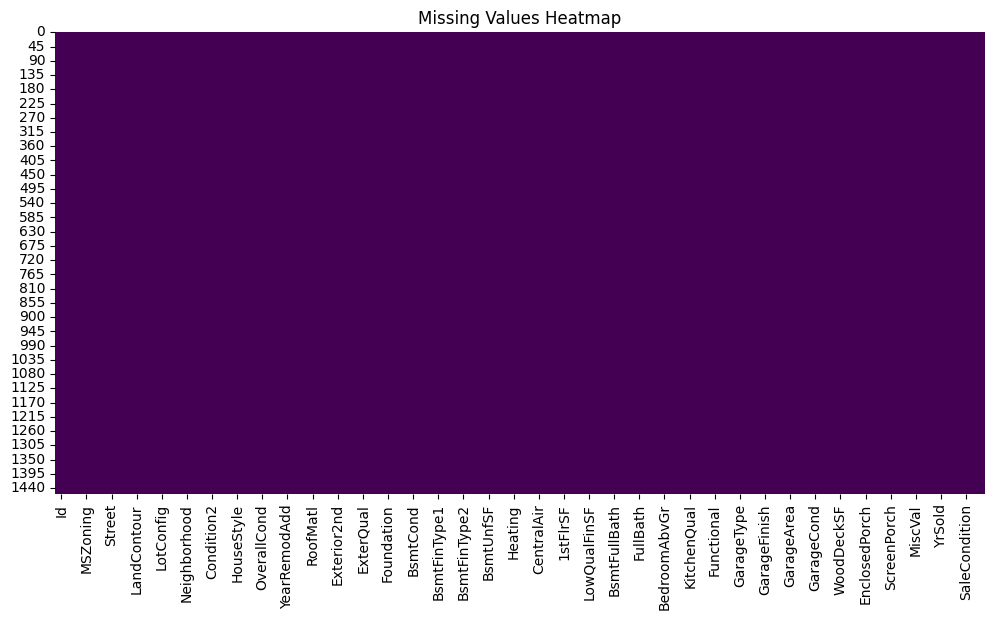

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [45]:
# by obseving we can see we have no missing value 

In [46]:
train_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [47]:
import pandas as pd

# Assuming you have a DataFrame named train_data


num_rows, num_columns = train_data.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)


Number of Rows: 1460
Number of Columns: 74


In [48]:
# converting catagorical value in numerical values

In [49]:
import pandas as pd

# Assuming `train_data` is your DataFrame with all the data

# Create a new DataFrame with one-hot encoding for categorical columns

df_encoded = pd.get_dummies(train_data, columns=[
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
    'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PavedDrive', 'SaleType', 'SaleCondition'
])

# The `df_encoded` DataFrame now contains one-hot encoded columns and numerical feature to


In [50]:
df_encoded.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_C

In [51]:
import pandas as pd

# Assuming you have a DataFrame named df_encoded


num_rows, num_columns = df_encoded.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 1460
Number of Columns: 267


In [52]:
# now we need to convert (true to 1) and (false to 0) 

In [53]:
# Convert True and False to 1 and 0 in the existing columns
columns_to_convert = ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3',
'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',  
'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 
'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 
'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 
'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 
'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 
'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr', 
'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn',
'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 
'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
'Condition2_RRNn', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 
'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 
'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_ClyTile', 
'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 
'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 
'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 
'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn',
'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood',
'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 
'Exterior2nd_Wd Shng', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 
'ExterCond_Ex', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 
'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 
'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 
'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Av',
'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_ALQ', 
'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 
'BsmtFinType1_Unf', 'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 
'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_Floor', 
'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 
'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 
'CentralAir_N', 'CentralAir_Y', 'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP',
'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 
'KitchenQual_TA', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'GarageType_2Types', 
'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 
'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 
'GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 
'GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 
'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_COD', 'SaleType_CWD', 
'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 
'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 
'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial']


# Convert True and False to 1 and 0 in the specified columns
df_encoded[columns_to_convert] = df_encoded[columns_to_convert].astype(int)


In [54]:
df_encoded.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_C

In [55]:
import pandas as pd

# Assuming you have a DataFrame named df_encoded


num_rows, num_columns = df_encoded.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)




Number of Rows: 1460
Number of Columns: 267


In [56]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming your data is in the 'df_encoded' DataFrame
data = df_encoded.copy()

# Extract the 'SalePrice' column for later
sale_price = data['SalePrice']
data = data.drop(columns=['Id', 'SalePrice'])  # Remove 'Id' and 'SalePrice' for scaling

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(data)

# Create a DataFrame with scaled data
df_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Add the 'SalePrice' column back
df_scaled['SalePrice'] = sale_price

# Now, df_scaled contains your data with min-max scaling applied, and 'SalePrice' is not scaled
# SalePrice is our target variable

In [57]:
df_scaled.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType

In [58]:
import pandas as pd

# Assuming you have a DataFrame named df_scaled


num_rows, num_columns = df_scaled.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 1460
Number of Columns: 266


In [59]:
# applying model 

In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [61]:
# Separate the features and the target variable (SalePrice)
X = df_scaled.drop("SalePrice", axis=1)
y = df_scaled["SalePrice"]

In [62]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [63]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType

In [64]:
import pandas as pd

# Assuming you have a DataFrame named X


num_rows, num_columns = X.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)



Number of Rows: 1460
Number of Columns: 265


In [65]:
# Define the neural network architecture
model = keras.Sequential([
    # Input layer
    keras.layers.Input(shape=(X_train.shape[1],)),
    
    # First hidden layer
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),  # Adding dropout for regularization 0.5
    
    # Second hidden layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),  # Adding dropout for regularization 0.5
    
    # Third hidden layer
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),  # Adding dropout for regularization 0.5
    
    # Output layer
    keras.layers.Dense(1)  # Since it's a regression problem, there's only one output node
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error for regression

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test)


Epoch 1/1000
37/37 [==============================] - 1s 28ms/step - loss: 38884712448.0000 - val_loss: 39651045376.0000
Epoch 2/1000
37/37 [==============================] - 0s 1ms/step - loss: 38875144192.0000 - val_loss: 39627800576.0000
Epoch 3/1000
37/37 [==============================] - 0s 1ms/step - loss: 38812942336.0000 - val_loss: 39495901184.0000
Epoch 4/1000
37/37 [==============================] - 0s 977us/step - loss: 38535737344.0000 - val_loss: 39009574912.0000
Epoch 5/1000
37/37 [==============================] - 0s 937us/step - loss: 37720195072.0000 - val_loss: 37707350016.0000
Epoch 6/1000
37/37 [==============================] - 0s 913us/step - loss: 35663822848.0000 - val_loss: 34880856064.0000
Epoch 7/1000
37/37 [==============================] - 0s 896us/step - loss: 31769860096.0000 - val_loss: 29968490496.0000
Epoch 8/1000
37/37 [==============================] - 0s 882us/step - loss: 26157737984.0000 - val_loss: 23234514944.0000
Epoch 9/1000
37/37 [=========

37/37 [==============================] - 0s 898us/step - loss: 7816858624.0000 - val_loss: 3307439360.0000
Epoch 69/1000
37/37 [==============================] - 0s 880us/step - loss: 7119869440.0000 - val_loss: 3137922816.0000
Epoch 70/1000
37/37 [==============================] - 0s 841us/step - loss: 7357932032.0000 - val_loss: 3250648320.0000
Epoch 71/1000
37/37 [==============================] - 0s 834us/step - loss: 6842821120.0000 - val_loss: 3168823552.0000
Epoch 72/1000
37/37 [==============================] - 0s 831us/step - loss: 7384410624.0000 - val_loss: 3159804672.0000
Epoch 73/1000
37/37 [==============================] - 0s 845us/step - loss: 6909156352.0000 - val_loss: 3258654720.0000
Epoch 74/1000
37/37 [==============================] - 0s 849us/step - loss: 7306104320.0000 - val_loss: 3287923200.0000
Epoch 75/1000
37/37 [==============================] - 0s 830us/step - loss: 7248749568.0000 - val_loss: 3335582208.0000
Epoch 76/1000
37/37 [=========================

37/37 [==============================] - 0s 901us/step - loss: 6927084032.0000 - val_loss: 2391611648.0000
Epoch 136/1000
37/37 [==============================] - 0s 923us/step - loss: 6662879232.0000 - val_loss: 2535949568.0000
Epoch 137/1000
37/37 [==============================] - 0s 966us/step - loss: 6498604032.0000 - val_loss: 2347594240.0000
Epoch 138/1000
37/37 [==============================] - 0s 891us/step - loss: 6319454208.0000 - val_loss: 2403873792.0000
Epoch 139/1000
37/37 [==============================] - 0s 928us/step - loss: 6404840960.0000 - val_loss: 2435373824.0000
Epoch 140/1000
37/37 [==============================] - 0s 972us/step - loss: 6875646464.0000 - val_loss: 2392289792.0000
Epoch 141/1000
37/37 [==============================] - 0s 873us/step - loss: 6198410752.0000 - val_loss: 2298705408.0000
Epoch 142/1000
37/37 [==============================] - 0s 860us/step - loss: 6226099200.0000 - val_loss: 2250265088.0000
Epoch 143/1000
37/37 [=================

37/37 [==============================] - 0s 862us/step - loss: 6883476480.0000 - val_loss: 2236722688.0000
Epoch 203/1000
37/37 [==============================] - 0s 871us/step - loss: 6440060416.0000 - val_loss: 2239161600.0000
Epoch 204/1000
37/37 [==============================] - 0s 845us/step - loss: 5629321216.0000 - val_loss: 1955774208.0000
Epoch 205/1000
37/37 [==============================] - 0s 854us/step - loss: 6359149056.0000 - val_loss: 2032560896.0000
Epoch 206/1000
37/37 [==============================] - 0s 842us/step - loss: 6806618624.0000 - val_loss: 2297438208.0000
Epoch 207/1000
37/37 [==============================] - 0s 848us/step - loss: 6966116864.0000 - val_loss: 2314593536.0000
Epoch 208/1000
37/37 [==============================] - 0s 839us/step - loss: 6547519488.0000 - val_loss: 2175824384.0000
Epoch 209/1000
37/37 [==============================] - 0s 918us/step - loss: 6605490688.0000 - val_loss: 2294470400.0000
Epoch 210/1000
37/37 [=================

37/37 [==============================] - 0s 917us/step - loss: 6480980480.0000 - val_loss: 2025243776.0000
Epoch 270/1000
37/37 [==============================] - 0s 944us/step - loss: 6333189120.0000 - val_loss: 2190457344.0000
Epoch 271/1000
37/37 [==============================] - 0s 953us/step - loss: 6489812992.0000 - val_loss: 2092142080.0000
Epoch 272/1000
37/37 [==============================] - 0s 931us/step - loss: 6779408896.0000 - val_loss: 2462417152.0000
Epoch 273/1000
37/37 [==============================] - 0s 999us/step - loss: 6312806912.0000 - val_loss: 2278387200.0000
Epoch 274/1000
37/37 [==============================] - 0s 966us/step - loss: 6984549376.0000 - val_loss: 2065820800.0000
Epoch 275/1000
37/37 [==============================] - 0s 915us/step - loss: 5890946048.0000 - val_loss: 2125339264.0000
Epoch 276/1000
37/37 [==============================] - 0s 997us/step - loss: 6387903488.0000 - val_loss: 2119399168.0000
Epoch 277/1000
37/37 [=================

37/37 [==============================] - 0s 949us/step - loss: 6410246656.0000 - val_loss: 2262871552.0000
Epoch 337/1000
37/37 [==============================] - 0s 947us/step - loss: 5842647040.0000 - val_loss: 1979529216.0000
Epoch 338/1000
37/37 [==============================] - 0s 1ms/step - loss: 6811307520.0000 - val_loss: 2120013056.0000
Epoch 339/1000
37/37 [==============================] - 0s 890us/step - loss: 6522974720.0000 - val_loss: 2104710144.0000
Epoch 340/1000
37/37 [==============================] - 0s 872us/step - loss: 6010349568.0000 - val_loss: 1981903104.0000
Epoch 341/1000
37/37 [==============================] - 0s 903us/step - loss: 6506865664.0000 - val_loss: 1955325824.0000
Epoch 342/1000
37/37 [==============================] - 0s 905us/step - loss: 6384721408.0000 - val_loss: 2024672128.0000
Epoch 343/1000
37/37 [==============================] - 0s 964us/step - loss: 6352543744.0000 - val_loss: 2259508224.0000
Epoch 344/1000
37/37 [===================

37/37 [==============================] - 0s 902us/step - loss: 5979035648.0000 - val_loss: 2192067584.0000
Epoch 404/1000
37/37 [==============================] - 0s 947us/step - loss: 6085124096.0000 - val_loss: 2074318720.0000
Epoch 405/1000
37/37 [==============================] - 0s 920us/step - loss: 6399688192.0000 - val_loss: 2256650752.0000
Epoch 406/1000
37/37 [==============================] - 0s 941us/step - loss: 6461996544.0000 - val_loss: 2209503744.0000
Epoch 407/1000
37/37 [==============================] - 0s 856us/step - loss: 6192257536.0000 - val_loss: 1960808832.0000
Epoch 408/1000
37/37 [==============================] - 0s 927us/step - loss: 6613804544.0000 - val_loss: 1830370816.0000
Epoch 409/1000
37/37 [==============================] - 0s 956us/step - loss: 6160876544.0000 - val_loss: 1853739520.0000
Epoch 410/1000
37/37 [==============================] - 0s 1ms/step - loss: 6557068800.0000 - val_loss: 1954663552.0000
Epoch 411/1000
37/37 [===================

37/37 [==============================] - 0s 849us/step - loss: 6136724480.0000 - val_loss: 1980443648.0000
Epoch 471/1000
37/37 [==============================] - 0s 877us/step - loss: 6164882432.0000 - val_loss: 2057317504.0000
Epoch 472/1000
37/37 [==============================] - 0s 842us/step - loss: 6224781824.0000 - val_loss: 2002400128.0000
Epoch 473/1000
37/37 [==============================] - 0s 833us/step - loss: 6273613312.0000 - val_loss: 1928755840.0000
Epoch 474/1000
37/37 [==============================] - 0s 832us/step - loss: 6238004736.0000 - val_loss: 1985351168.0000
Epoch 475/1000
37/37 [==============================] - 0s 825us/step - loss: 5913900032.0000 - val_loss: 2012604928.0000
Epoch 476/1000
37/37 [==============================] - 0s 826us/step - loss: 6419060224.0000 - val_loss: 1997491968.0000
Epoch 477/1000
37/37 [==============================] - 0s 837us/step - loss: 6561568256.0000 - val_loss: 2085227392.0000
Epoch 478/1000
37/37 [=================

37/37 [==============================] - 0s 869us/step - loss: 5925896192.0000 - val_loss: 2053983360.0000
Epoch 538/1000
37/37 [==============================] - 0s 926us/step - loss: 5990313984.0000 - val_loss: 2094698240.0000
Epoch 539/1000
37/37 [==============================] - 0s 917us/step - loss: 6214522368.0000 - val_loss: 2001425408.0000
Epoch 540/1000
37/37 [==============================] - 0s 913us/step - loss: 5592686080.0000 - val_loss: 1844567680.0000
Epoch 541/1000
37/37 [==============================] - 0s 925us/step - loss: 6570301952.0000 - val_loss: 1977068544.0000
Epoch 542/1000
37/37 [==============================] - 0s 934us/step - loss: 5863768064.0000 - val_loss: 2068203904.0000
Epoch 543/1000
37/37 [==============================] - 0s 920us/step - loss: 6187040256.0000 - val_loss: 2064982144.0000
Epoch 544/1000
37/37 [==============================] - 0s 926us/step - loss: 6417937920.0000 - val_loss: 2089466368.0000
Epoch 545/1000
37/37 [=================

37/37 [==============================] - 0s 936us/step - loss: 6292998144.0000 - val_loss: 1909326080.0000
Epoch 605/1000
37/37 [==============================] - 0s 910us/step - loss: 6533984256.0000 - val_loss: 1990488064.0000
Epoch 606/1000
37/37 [==============================] - 0s 907us/step - loss: 6514872832.0000 - val_loss: 1939286528.0000
Epoch 607/1000
37/37 [==============================] - 0s 909us/step - loss: 5982285312.0000 - val_loss: 1920881536.0000
Epoch 608/1000
37/37 [==============================] - 0s 966us/step - loss: 5902880256.0000 - val_loss: 1773104256.0000
Epoch 609/1000
37/37 [==============================] - 0s 891us/step - loss: 5732758528.0000 - val_loss: 2012960896.0000
Epoch 610/1000
37/37 [==============================] - 0s 938us/step - loss: 5585399808.0000 - val_loss: 1892047872.0000
Epoch 611/1000
37/37 [==============================] - 0s 970us/step - loss: 6112617472.0000 - val_loss: 1988341120.0000
Epoch 612/1000
37/37 [=================

37/37 [==============================] - 0s 915us/step - loss: 6074295808.0000 - val_loss: 2116530688.0000
Epoch 672/1000
37/37 [==============================] - 0s 973us/step - loss: 6459133440.0000 - val_loss: 1923744640.0000
Epoch 673/1000
37/37 [==============================] - 0s 925us/step - loss: 6391321088.0000 - val_loss: 1986723328.0000
Epoch 674/1000
37/37 [==============================] - 0s 896us/step - loss: 6006097920.0000 - val_loss: 2041829248.0000
Epoch 675/1000
37/37 [==============================] - 0s 960us/step - loss: 6973097984.0000 - val_loss: 2015215104.0000
Epoch 676/1000
37/37 [==============================] - 0s 865us/step - loss: 6398005760.0000 - val_loss: 1897767424.0000
Epoch 677/1000
37/37 [==============================] - 0s 882us/step - loss: 6001861632.0000 - val_loss: 1999024128.0000
Epoch 678/1000
37/37 [==============================] - 0s 897us/step - loss: 6305699328.0000 - val_loss: 2081287808.0000
Epoch 679/1000
37/37 [=================

37/37 [==============================] - 0s 855us/step - loss: 6386000384.0000 - val_loss: 2007414784.0000
Epoch 739/1000
37/37 [==============================] - 0s 861us/step - loss: 5882648064.0000 - val_loss: 2164300032.0000
Epoch 740/1000
37/37 [==============================] - 0s 851us/step - loss: 6705387008.0000 - val_loss: 2155515136.0000
Epoch 741/1000
37/37 [==============================] - 0s 844us/step - loss: 6555021824.0000 - val_loss: 2190802432.0000
Epoch 742/1000
37/37 [==============================] - 0s 887us/step - loss: 6049101824.0000 - val_loss: 2172672768.0000
Epoch 743/1000
37/37 [==============================] - 0s 881us/step - loss: 6356887040.0000 - val_loss: 2045282048.0000
Epoch 744/1000
37/37 [==============================] - 0s 922us/step - loss: 6206041600.0000 - val_loss: 2268478464.0000
Epoch 745/1000
37/37 [==============================] - 0s 874us/step - loss: 6366417408.0000 - val_loss: 1968141184.0000
Epoch 746/1000
37/37 [=================

37/37 [==============================] - 0s 834us/step - loss: 6699706880.0000 - val_loss: 2208633344.0000
Epoch 806/1000
37/37 [==============================] - 0s 855us/step - loss: 6704031232.0000 - val_loss: 2074588800.0000
Epoch 807/1000
37/37 [==============================] - 0s 840us/step - loss: 6459671040.0000 - val_loss: 1957719680.0000
Epoch 808/1000
37/37 [==============================] - 0s 840us/step - loss: 6774462976.0000 - val_loss: 2006957184.0000
Epoch 809/1000
37/37 [==============================] - 0s 834us/step - loss: 6477656576.0000 - val_loss: 2086676608.0000
Epoch 810/1000
37/37 [==============================] - 0s 865us/step - loss: 6323992064.0000 - val_loss: 1640560512.0000
Epoch 811/1000
37/37 [==============================] - 0s 918us/step - loss: 6077260800.0000 - val_loss: 1972940160.0000
Epoch 812/1000
37/37 [==============================] - 0s 880us/step - loss: 5914560512.0000 - val_loss: 1931093376.0000
Epoch 813/1000
37/37 [=================

37/37 [==============================] - 0s 915us/step - loss: 5850560512.0000 - val_loss: 1749883392.0000
Epoch 873/1000
37/37 [==============================] - 0s 909us/step - loss: 5495208448.0000 - val_loss: 1901239296.0000
Epoch 874/1000
37/37 [==============================] - 0s 894us/step - loss: 6098621952.0000 - val_loss: 2009075840.0000
Epoch 875/1000
37/37 [==============================] - 0s 901us/step - loss: 6212049408.0000 - val_loss: 1900439424.0000
Epoch 876/1000
37/37 [==============================] - 0s 886us/step - loss: 6278388736.0000 - val_loss: 1897795584.0000
Epoch 877/1000
37/37 [==============================] - 0s 902us/step - loss: 6393922560.0000 - val_loss: 1893541504.0000
Epoch 878/1000
37/37 [==============================] - 0s 1ms/step - loss: 6282341376.0000 - val_loss: 1873869056.0000
Epoch 879/1000
37/37 [==============================] - 0s 1ms/step - loss: 5260228608.0000 - val_loss: 1748257024.0000
Epoch 880/1000
37/37 [=====================

37/37 [==============================] - 0s 890us/step - loss: 5687442944.0000 - val_loss: 2112264960.0000
Epoch 940/1000
37/37 [==============================] - 0s 906us/step - loss: 5936337920.0000 - val_loss: 2028987136.0000
Epoch 941/1000
37/37 [==============================] - 0s 929us/step - loss: 5741831168.0000 - val_loss: 1753867392.0000
Epoch 942/1000
37/37 [==============================] - 0s 909us/step - loss: 5621561856.0000 - val_loss: 1950231040.0000
Epoch 943/1000
37/37 [==============================] - 0s 883us/step - loss: 5586386432.0000 - val_loss: 1815865088.0000
Epoch 944/1000
37/37 [==============================] - 0s 952us/step - loss: 5892726272.0000 - val_loss: 1818217984.0000
Epoch 945/1000
37/37 [==============================] - 0s 900us/step - loss: 5794944000.0000 - val_loss: 1884301568.0000
Epoch 946/1000
37/37 [==============================] - 0s 983us/step - loss: 6185765888.0000 - val_loss: 1826688128.0000
Epoch 947/1000
37/37 [=================

In [66]:
import pandas as pd

# Assuming you have a DataFrame named X_test


num_rows, num_columns = X_test.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)



Number of Rows: 292
Number of Columns: 265


In [67]:
X_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType

In [68]:
print(y_pred)

[[120878.21 ]
 [303394.16 ]
 [ 72998.4  ]
 [148716.7  ]
 [291104.8  ]
 [ 42408.367]
 [203210.02 ]
 [128371.14 ]
 [ 39172.336]
 [119077.04 ]
 [114165.6  ]
 [ 90320.87 ]
 [ 91204.49 ]
 [195844.47 ]
 [148913.27 ]
 [110192.89 ]
 [162477.33 ]
 [105448.695]
 [112268.805]
 [180134.89 ]
 [147156.5  ]
 [174104.45 ]
 [160364.05 ]
 [109633.29 ]
 [172385.47 ]
 [123874.09 ]
 [170987.97 ]
 [ 90090.234]
 [147360.42 ]
 [179535.38 ]
 [116870.445]
 [243044.36 ]
 [196277.45 ]
 [ 91714.2  ]
 [215550.19 ]
 [120197.43 ]
 [118659.94 ]
 [180263.05 ]
 [267509.3  ]
 [ 97237.96 ]
 [126123.586]
 [198495.27 ]
 [ 88055.72 ]
 [315952.75 ]
 [115833.91 ]
 [135177.1  ]
 [ 88281.49 ]
 [107957.05 ]
 [361549.2  ]
 [116815.01 ]
 [ 96605.23 ]
 [214879.   ]
 [ 95138.49 ]
 [215952.9  ]
 [162488.2  ]
 [187683.89 ]
 [180255.55 ]
 [170836.8  ]
 [106638.17 ]
 [ 88803.266]
 [ 55042.543]
 [150146.27 ]
 [279072.8  ]
 [220408.14 ]
 [269230.78 ]
 [143010.42 ]
 [ 85085.49 ]
 [252976.45 ]
 [102672.87 ]
 [152480.52 ]
 [107748.98 ]
 [ 987

In [69]:
# seeing my predictions

# Convert the predictions to a Pandas DataFrame
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

# Display the first few rows of the predictions
print(predictions_df.head())

      Actual      Predicted
892   154500  120878.210938
1105  325000  303394.156250
413   115000   72998.398438
522   159000  148716.703125
1036  315500  291104.812500


In [70]:
# Assuming you already have the DataFrame 'predictions_df' with 'Actual' and 'Predicted' columns
print(predictions_df)


      Actual      Predicted
892   154500  120878.210938
1105  325000  303394.156250
413   115000   72998.398438
522   159000  148716.703125
1036  315500  291104.812500
614    75500   42408.367188
218   311500  203210.015625
1160  146000  128371.140625
649    84500   39172.335938
887   135500  119077.039062
576   145000  114165.601562
1252  130000   90320.867188
1061   81000   91204.492188
567   214000  195844.468750
1108  181000  148913.265625
1113  134500  110192.890625
168   183500  162477.328125
1102  135000  105448.695312
1120  118400  112268.804688
67    226000  180134.890625
1040  155000  147156.500000
453   210000  174104.453125
670   173500  160364.046875
1094  129000  109633.289062
192   192000  172385.468750
123   153900  123874.093750
415   181134  170987.968750
277   141000   90090.234375
433   181000  147360.421875
1317  208900  179535.375000
184   127000  116870.445312
554   284000  243044.359375
1173  200500  196277.453125
76    135750   91714.203125
906   255000  215550

In [71]:
import pandas as pd

# Assuming you have a DataFrame named df_scaled


num_rows, num_columns = predictions_df.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 292
Number of Columns: 2


In [72]:
import numpy as np

# Assuming y_test and y_pred contain the actual and predicted values
y_actual = np.array(y_test)
y_predicted = np.array(y_pred.flatten())

# Calculate the correlation coefficient
correlation = np.corrcoef(y_actual, y_predicted)[0, 1]
print("Correlation between Actual and Predicted:", correlation)


Correlation between Actual and Predicted: 0.9313215833116325


In [73]:
pip install h5py


Note: you may need to restart the kernel to use updated packages.


In [74]:
import h5py
from tensorflow.keras.models import load_model, save_model

# Train your Keras model 
model.fit(X_train, y_train, epochs=10)

# Save the model to an HDF5 file (an industry-standard format)
save_model(model, 'my_model.h5')


Epoch 1/10
37/37 [==============================] - 0s 695us/step - loss: 5717921792.0000
Epoch 2/10
37/37 [==============================] - 0s 623us/step - loss: 5902935040.0000
Epoch 3/10
37/37 [==============================] - 0s 680us/step - loss: 6546768896.0000
Epoch 4/10
37/37 [==============================] - 0s 692us/step - loss: 6109341696.0000
Epoch 5/10
37/37 [==============================] - 0s 636us/step - loss: 6093655040.0000
Epoch 6/10
37/37 [==============================] - 0s 703us/step - loss: 5593383936.0000
Epoch 7/10
37/37 [==============================] - 0s 686us/step - loss: 6136268800.0000
Epoch 8/10
37/37 [==============================] - 0s 650us/step - loss: 5646046720.0000
Epoch 9/10
37/37 [==============================] - 0s 699us/step - loss: 5612469760.0000
Epoch 10/10
37/37 [==============================] - 0s 620us/step - loss: 6435327488.0000


/var/folders/xm/_6m30k1j1kbgb2ps1nz6t4d00000gn/T/ipykernel_93737/317184631.py:8: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'my_model.h5')


In [75]:
from tensorflow.keras.models import load_model

# Load the trained model
loaded_model = load_model('my_model.h5')


In [77]:
import pandas as pd

# Load the test data for making predictions

test_data = pd.read_csv('my_dataset.csv')

In [78]:
import pandas as pd

# Assuming we have a DataFrame named test_data


num_rows, num_columns = test_data.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)



Number of Rows: 1459
Number of Columns: 264


In [ ]:
# Make predictions on training set

y_pred_final = model.predict(test_data)

In [ ]:
# now our predicted values will be stored in "sample_submission_1.csv"

pred=pd.DataFrame(y_pred)
pred.columns=['Id','SalePrice']
pred.to_csv('sample_submission_1.csv',index=False)